<a href="https://colab.research.google.com/github/Vavillayashu007/Underwater-Object-Recognition-Using-Deep-Learning-Techniques/blob/main/Underwater_Object_Recognition_Using_Deep_Learning_Techniques(ANN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout

In [2]:
new_column_names = [f"Feature {i}" for i in range(60)]
new_column_names.append("Class")
train = pd.read_csv('/sonar.all-data (1).csv', header=None, names=new_column_names)

In [3]:
train.head()

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 51,Feature 52,Feature 53,Feature 54,Feature 55,Feature 56,Feature 57,Feature 58,Feature 59,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
train = train.replace({'Class': {'M': 0, 'R': 1}})
x = train.drop("Class", axis=1)
y = train['Class']

<ipython-input-4-5321e4c46110>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train = train.replace({'Class': {'M': 0, 'R': 1}})


<ipython-input-5-c7c8e49e4fdd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='pastel')


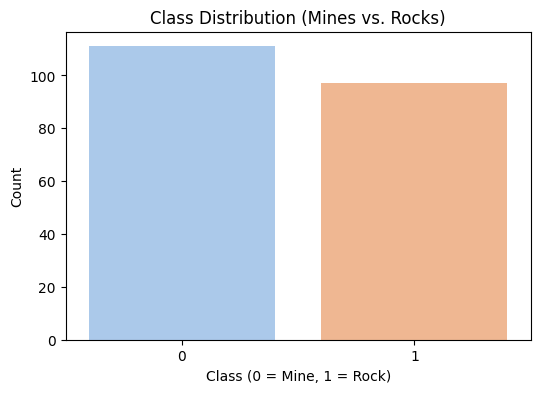

In [5]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette='pastel')
plt.title("Class Distribution (Mines vs. Rocks)")
plt.xlabel("Class (0 = Mine, 1 = Rock)")
plt.ylabel("Count")
plt.show()

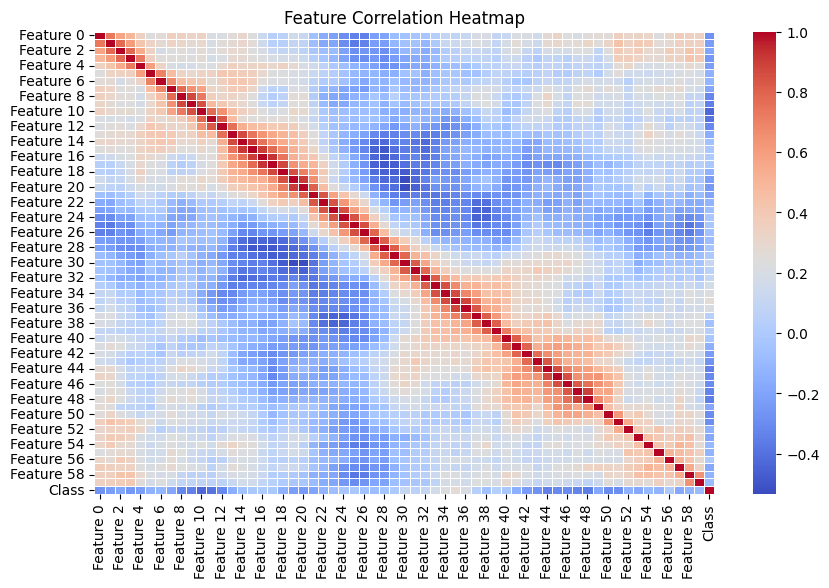

In [6]:
plt.figure(figsize=(10, 6))
sns.heatmap(train.corr(), cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [7]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [8]:
y.value_counts()

,count
Class,
0,111
1,97


In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=26, stratify=y)

In [11]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(60,)),
    Dropout(0.3),  # Regularization to prevent overfitting
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Model compilation
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(x_train, y_train, epochs=100, batch_size=16, validation_data=(x_test, y_test), verbose=1)

y_pred = (model.predict(x_test) > 0.5).astype("int32")

# performance metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nTest Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.5328 - loss: 0.7517 - val_accuracy: 0.5714 - val_loss: 0.6740
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5534 - loss: 0.6927 - val_accuracy: 0.7381 - val_loss: 0.5872
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6068 - loss: 0.6502 - val_accuracy: 0.7857 - val_loss: 0.5319
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6213 - loss: 0.5884 - val_accuracy: 0.7857 - val_loss: 0.4949
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7700 - loss: 0.5366 - val_accuracy: 0.7619 - val_loss: 0.4658
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7933 - loss: 0.4915 - val_accuracy: 0.8095 - val_loss: 0.4385
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7980 - loss: 0.4290 - val_accuracy: 0.8095 - val_loss: 0.4187
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8197 - loss: 0.4152 - val_accuracy: 0.8095 - val_l

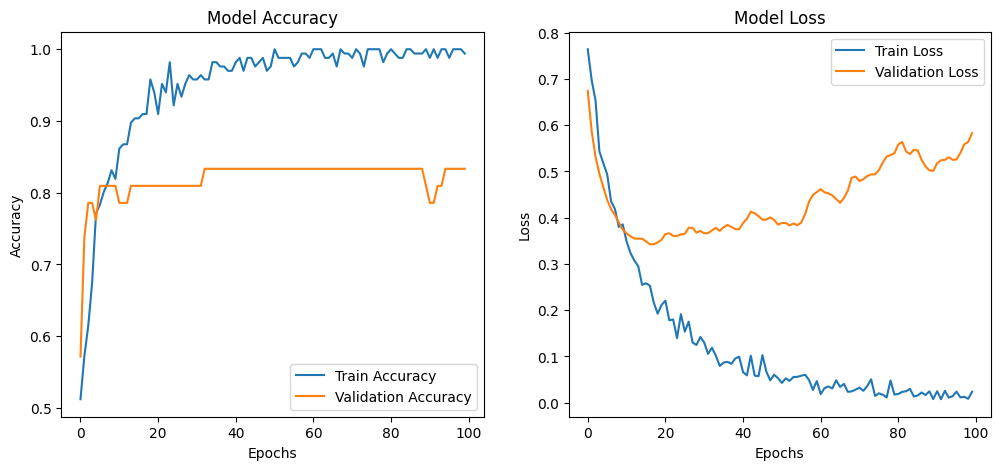

In [12]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.show()

In [13]:
model = Sequential([
    SimpleRNN(64, activation='relu', return_sequences=True, input_shape=(60, 1)),
    Dropout(0.3),
    SimpleRNN(32, activation='relu'),  # Second RNN layer
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])


# model compilation
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(x_train, y_train, epochs=100, batch_size=16, validation_data=(x_test, y_test), verbose=1)

# Model evaluation
y_pred = (model.predict(x_test) > 0.5).astype("int32")

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nTest Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.4668 - loss: 0.6901 - val_accuracy: 0.4524 - val_loss: 0.6785
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.4750 - loss: 0.6944 - val_accuracy: 0.5000 - val_loss: 0.6707
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.5744 - loss: 0.6479 - val_accuracy: 0.5238 - val_loss: 0.6566
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6279 - loss: 0.6165 - val_accuracy: 0.4762 - val_loss: 0.6562
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6160 - loss: 0.6149 - val_accuracy: 0.5476 - val_loss: 0.6476
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6314 - loss: 0.6706 - val_accuracy: 0.6190 - val_loss: 0.6450
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.6261 - loss: 0.6251 - val_accuracy: 0.6429 - val_loss: 0.6400
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.6430 - loss: 0.6237 - val_accuracy: 0.6667 - val_l

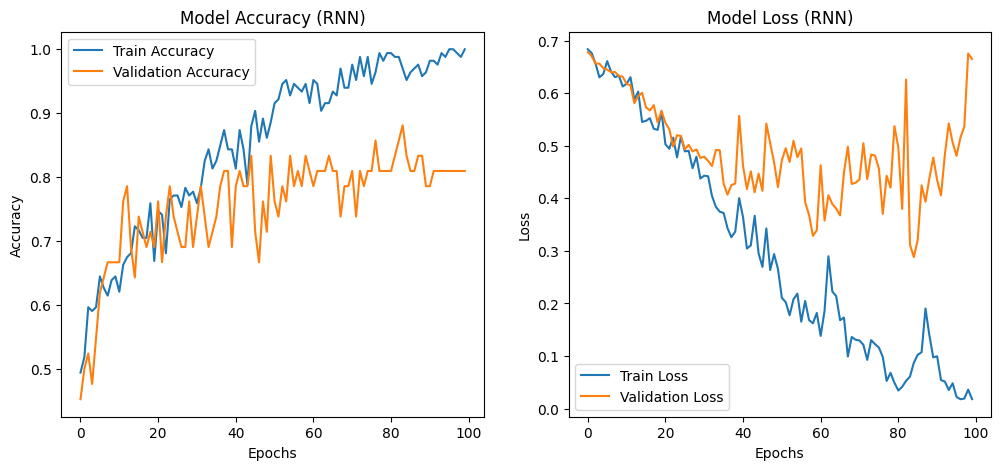

In [14]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy (RNN)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss (RNN)')
plt.legend()

plt.show()
